In [2]:
import scanpy as sc

In [42]:
#pip install LingerGRN==1.67

  Attempting uninstall: LingerGRN
    Found existing installation: LingerGRN 1.91
    Uninstalling LingerGRN-1.91:
      Successfully uninstalled LingerGRN-1.91
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os 
os.getenv('PATH')
current_path = os.getenv('PATH')

# Add the path to the Conda environment
conda_path = os.path.expanduser("~/.conda/envs/LINGER3/bin")
new_path = conda_path + os.pathsep + current_path
os.environ['PATH'] = new_path
print(os.getenv('PATH'))

In [3]:
import psutil
memory_info = psutil.virtual_memory()

print(f"Total Memory: {memory_info.total / (1024 * 1024):.2f} MB")
print(f"Available Memory: {memory_info.available / (1024 * 1024):.2f} MB")


Total Memory: 2063080.44 MB
Available Memory: 1297298.00 MB


In [4]:
import os
current_path = os.getcwd()
print(current_path)

/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER


In [5]:
method='LINGER'

In [6]:
adata = sc.read_10x_h5("/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/PBMC/filtered_feature_bc_matrix.h5", gex_only=False)

/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
import scipy.sparse as sp
import pandas as pd

In [10]:
label=pd.read_csv('PBMC_label.txt',sep='\t',header=0)

In [11]:
label

,barcode_use,label
0,AAACAGCCAAGGAATC-1,naive CD4 T cells
1,AAACAGCCAATCCCTT-1,memory CD4 T cells
2,AAACAGCCAATGCGCT-1,naive CD4 T cells
3,AAACAGCCAGTAGGTG-1,naive CD4 T cells
4,AAACAGCCAGTTTACG-1,memory CD4 T cells
...,...,...
9538,TTTGTTGGTGACATGC-1,naive CD8 T cells
9539,TTTGTTGGTGTTAAAC-1,naive CD8 T cells
9540,TTTGTTGGTTAGGATT-1,CD56 (bright) NK cells
9541,TTTGTTGGTTGGTTAG-1,memory CD4 T cells


In [13]:
%%time
matrix=adata.X.T
adata.var['gene_ids']=adata.var.index
features=pd.DataFrame(adata.var['gene_ids'].values.tolist(),columns=[1])
features[2]=adata.var['feature_types'].values
barcodes=pd.DataFrame(adata.obs_names,columns=[0])
from LingerGRN.preprocess import *
adata_RNA,adata_ATAC=get_adata(matrix,features,barcodes,label)# adata_RNA and adata_ATAC are scRNA and scATAC

/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.9.2 umap==0.5.6 numpy==1.24.3 scipy==1.11.3 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.1 pynndescent==0.5.13


/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/LingerGRN/preprocess.py:288: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_RNA.obs['label']=label.loc[adata_RNA.obs['barcode']]['label'].values
/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/LingerGRN/preprocess.py:291: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ATAC.obs['label']=label.loc[adata_ATAC.obs['barcode']]['label'].values


CPU times: user 11.9 s, sys: 2.68 s, total: 14.5 s
Wall time: 23 s


In [14]:
adata_RNA.obs

,barcode,sample,label,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
0,AAACAGCCAAGGAATC-1,1,naive CD4 T cells,3308,8380.0,0.0,0.0
1,AAACAGCCAATCCCTT-1,1,memory CD4 T cells,1896,3771.0,0.0,0.0
2,AAACAGCCAATGCGCT-1,1,naive CD4 T cells,2904,6876.0,0.0,0.0
6,AAACAGCCAGTAGGTG-1,1,naive CD4 T cells,3061,7614.0,0.0,0.0
7,AAACAGCCAGTTTACG-1,1,memory CD4 T cells,1691,3633.0,0.0,0.0
...,...,...,...,...,...,...,...
11903,TTTGTTGGTGACATGC-1,1,naive CD8 T cells,1586,3285.0,0.0,0.0
11904,TTTGTTGGTGTTAAAC-1,1,naive CD8 T cells,1525,2866.0,0.0,0.0
11905,TTTGTTGGTTAGGATT-1,1,CD56 (bright) NK cells,2024,4148.0,0.0,0.0
11907,TTTGTTGGTTGGTTAG-1,1,memory CD4 T cells,1620,2976.0,0.0,0.0


In [11]:
adata_ATAC.obs

,barcode,sample,label
7275,GCTTAACAGTGAGCAA-1,1,classical monocytes
5380,CTCTATGTCCGCAAGC-1,1,naive CD4 T cells
1914,AGGTTAGAGTTAGCCG-1,1,naive CD8 T cells
8188,GTAAGCGCACCTATAG-1,1,effector CD8 T cells
2002,AGTATAGCAGGAACCA-1,1,naive CD4 T cells
...,...,...,...
1946,AGTAACACAATTAACC-1,1,memory CD4 T cells
11898,TTTGTGTTCGTCAAGT-1,1,classical monocytes
153,AACAGGATCATGCAAC-1,1,non-classical monocytes
4955,CGTTTGGAGGCCATCA-1,1,classical monocytes


In [15]:
%%time
import scanpy as sc
sc.pp.filter_cells(adata_RNA, min_genes=200)
sc.pp.filter_genes(adata_RNA, min_cells=3)
sc.pp.filter_cells(adata_ATAC, min_genes=200)
sc.pp.filter_genes(adata_ATAC, min_cells=3)
selected_barcode=list(set(adata_RNA.obs['barcode'].values)&set(adata_ATAC.obs['barcode'].values))
barcode_idx=pd.DataFrame(range(adata_RNA.shape[0]), index=adata_RNA.obs['barcode'].values)
adata_RNA = adata_RNA[barcode_idx.loc[selected_barcode][0]]
barcode_idx=pd.DataFrame(range(adata_ATAC.shape[0]), index=adata_ATAC.obs['barcode'].values)
adata_ATAC = adata_ATAC[barcode_idx.loc[selected_barcode][0]]

filtered out 11116 genes that are detected in less than 3 cells
filtered out 1169 genes that are detected in less than 3 cells
CPU times: user 1.96 s, sys: 2.81 s, total: 4.77 s
Wall time: 4.77 s


In [16]:
adata_RNA.obs

,barcode,sample,label,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes
2156,ATAACGACATTAAACC-1,1,classical monocytes,1654,3266.0,0.0,0.0,1654
4621,CGGACAACACAAAGGT-1,1,classical monocytes,1556,2789.0,0.0,0.0,1556
9495,TAGGCTGTCAGGTCCA-1,1,CD56 (bright) NK cells,1556,2791.0,0.0,0.0,1556
7513,GGATTATGTTTCCTCC-1,1,classical monocytes,2191,5024.0,0.0,0.0,2191
9722,TATTAGGTCGTTTCGC-1,1,naive CD8 T cells,1687,3334.0,0.0,0.0,1687
...,...,...,...,...,...,...,...,...
10077,TCCTCAATCGCTAGAT-1,1,memory CD4 T cells,1427,2678.0,0.0,0.0,1427
630,AATGTCCAGCGCCTTT-1,1,CD56 (bright) NK cells,1622,3076.0,0.0,0.0,1622
7151,GCTCGATCAGGCAAGC-1,1,effector CD8 T cells,1433,2637.0,0.0,0.0,1433
2619,ATGTTGTCAACCGCCA-1,1,intermediate monocytes,2916,6767.0,0.0,0.0,2916


In [17]:
adata_ATAC.obs

,barcode,sample,label,n_genes
2156,ATAACGACATTAAACC-1,1,classical monocytes,8783
4621,CGGACAACACAAAGGT-1,1,classical monocytes,8372
9495,TAGGCTGTCAGGTCCA-1,1,CD56 (bright) NK cells,4999
7513,GGATTATGTTTCCTCC-1,1,classical monocytes,9338
9722,TATTAGGTCGTTTCGC-1,1,naive CD8 T cells,8622
...,...,...,...,...
10077,TCCTCAATCGCTAGAT-1,1,memory CD4 T cells,7211
630,AATGTCCAGCGCCTTT-1,1,CD56 (bright) NK cells,4866
7151,GCTCGATCAGGCAAGC-1,1,effector CD8 T cells,8118
2619,ATGTTGTCAACCGCCA-1,1,intermediate monocytes,9124


# Generate pseudo-blocks/meta-cells:

In [18]:
%%time
from LingerGRN.pseudo_bulk import *
samplelist=list(set(adata_ATAC.obs['sample'].values)) # sample is generated from cell barcode 
tempsample=samplelist[0]
TG_pseudobulk=pd.DataFrame([])
RE_pseudobulk=pd.DataFrame([])
singlepseudobulk = (adata_RNA.obs['sample'].unique().shape[0]*adata_RNA.obs['sample'].unique().shape[0]>100)
for tempsample in samplelist:
    adata_RNAtemp=adata_RNA[adata_RNA.obs['sample']==tempsample]
    adata_ATACtemp=adata_ATAC[adata_ATAC.obs['sample']==tempsample]
    TG_pseudobulk_temp,RE_pseudobulk_temp=pseudo_bulk(adata_RNAtemp,adata_ATACtemp,singlepseudobulk)                
    TG_pseudobulk=pd.concat([TG_pseudobulk, TG_pseudobulk_temp], axis=1)
    RE_pseudobulk=pd.concat([RE_pseudobulk, RE_pseudobulk_temp], axis=1)
    RE_pseudobulk[RE_pseudobulk > 100] = 100



/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


computing PCA
    on highly variable genes
    with n_comps=15
    finished (0:00:01)


/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:372: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=15
    finished (0:00:06)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
CPU times: user 2min 18s, sys: 1min 31s, total: 3min 50s
Wall time: 56.1 s


In [16]:
TG_pseudobulk

,TGCACCTTCCGCCAAA-1,AAGCCACGTTTGGGCG-1,GTGGATGCACCGGTAT-1,AATCTCAAGTAACGGA-1,GTGCGGTTCCTCACTA-1,GTATTGATCGATTATG-1,TCTCACCAGTTTCCGC-1,CCGACAGGTACTTAGG-1,AACCTCCTCCTCGATC-1,GTAGCTGTCCGGCTAA-1,...,AGGAAACGTGCTGTAA-1,AGCCAGTGTCATAACG-1,GCTTTATTCGCTAGAT-1,GGTTTAATCACATTGA-1,GCTGCAATCATCAGTA-1,GACCTGCAGGGATTAG-1,ACAGGTAAGGACGTAA-1,TGAGAACCAACCTAAT-1,ACCAAACTCAGCAAGA-1,TCTAACTTCAAGGACA-1
AL627309.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL627309.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.074520,0.085525,0.000000,0.000000,0.074782,0.000000,0.000000
AL627309.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.071071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL669831.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076153,0.000000
LINC01409,0.146101,0.146661,0.081584,0.064783,0.136781,0.000000,0.164845,0.084657,0.000000,0.095371,...,0.084206,0.084206,0.000000,0.091535,0.000000,0.000000,0.098520,0.069944,0.091070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,0.150030,0.081171,0.000000,0.000000,0.253529,0.220942,0.271752,0.063615,0.447473,0.320560,...,0.432634,0.252061,0.277631,0.319943,0.166069,0.337046,0.143946,0.237729,0.195545,0.337825
AC240274.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080405,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.076627,0.000000,0.000000,0.110674,0.000000,0.082127,0.072919
AC004556.3,0.080944,0.068877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.081171,0.158751,0.000000,0.063780,0.073613,0.000000,0.077569,0.070127,0.082806
AC007325.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# ==========================================================

In [12]:
pip  install memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [13]:
%load_ext memory_profiler

In [14]:
import os
if not os.path.exists('./data/'):
    os.mkdir('./data/')

In [18]:

adata_ATAC.write('./data/adata_ATAC.h5ad')
adata_RNA.write('./data/adata_RNA.h5ad')
TG_pseudobulk=TG_pseudobulk.fillna(0)
RE_pseudobulk=RE_pseudobulk.fillna(0)
pd.DataFrame(adata_ATAC.var['gene_ids']).to_csv('./data/Peaks.txt',header=None,index=None)
TG_pseudobulk.to_csv('./data/TG_pseudobulk.tsv')
RE_pseudobulk.to_csv('./data/RE_pseudobulk.tsv')

/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


# reopen file

import anndata
adata_ATAC = anndata.read_h5ad('./data/adata_ATAC.h5ad')
adata_RNA = anndata.read_h5ad('./data/adata_RNA.h5ad')

TG_pseudobulk = pd.read_csv('./data/TG_pseudobulk.tsv', sep=',')
RE_pseudobulk = pd.read_csv('./data/RE_pseudobulk.tsv', sep=',')

# Train the model/overlap the region with the general GRN:

In [19]:
if not os.path.exists('./output/'):
    os.mkdir('./output/')

In [17]:
%%time
%%memit
from LingerGRN.preprocess import *
Datadir='/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER/'# This directory should be the same as Datadir defined in the above 'Download the general gene regulatory network' section
GRNdir=Datadir+'data_bulk/'
genome='hg38'
outdir='/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER/output/' #output dir

/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.9.2 umap==0.5.6 numpy==1.24.3 scipy==1.11.3 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.1 pynndescent==0.5.13
peak memory: 2881.13 MiB, increment: 53.75 MiB
CPU times: user 3.72 s, sys: 173 ms, total: 3.89 s
Wall time: 5.2 s


In [ ]:
%%time
%%memit
preprocess(TG_pseudobulk,RE_pseudobulk,GRNdir,genome,method,outdir)

In [18]:
%memit

peak memory: 2881.13 MiB, increment: 0.00 MiB


In [ ]:
%%time
%%memit
import LingerGRN.LINGER_tr as LINGER_tr
species = 'human' 
activef='ReLU' # active function chose from 'ReLU','sigmoid','tanh'
LINGER_tr.training(GRNdir,method,outdir,activef,species)

# Cell population gene regulatory network


In [ ]:
#TF binding potential  The output is 'cell_population_TF_RE_binding.txt', a matrix of the TF-RE binding score.

In [19]:
import LingerGRN.LL_net as LL_net

In [40]:
%%time
%%memit
import LingerGRN.LL_net as LL_net
LL_net.TF_RE_binding(GRNdir,adata_RNA,adata_ATAC,genome,method,outdir)

Generating cellular population TF binding strength ...


 70%|███████   | 7/10 [00:44<00:15,  5.25s/it]


100%|██████████| 23/23 [1:25:51<00:00, 223.99s/it]


peak memory: 8003.26 MiB, increment: 3080.92 MiB
CPU times: user 3h 44min 7s, sys: 7h 28min 30s, total: 11h 12min 38s
Wall time: 1h 26min 51s


In [ ]:
#cis-regulatory network
#The output is 'cell_population_cis_regulatory.txt' with 3 columns: region, target gene, cis-regulatory score.

In [50]:
%%time
%%memit
LL_net.cis_reg(GRNdir,adata_RNA,adata_ATAC,genome,method,outdir)

100%|██████████| 23/23 [07:22<00:00, 19.22s/it]


peak memory: 17486.97 MiB, increment: 8527.57 MiB
CPU times: user 2min 15s, sys: 1min 9s, total: 3min 24s
Wall time: 7min 28s


In [ ]:
#trans-regulatory network
#The output is 'cell_population_trans_regulatory.txt', a matrix of the trans-regulatory score.

In [20]:
genome='hg38'

In [53]:
%%time
%%memit
LL_net.trans_reg(GRNdir,method,outdir)

Generate trans-regulatory netowrk ...


100%|██████████| 23/23 [05:40<00:00, 14.80s/it]


Save trans-regulatory netowrk ...
peak memory: 18243.64 MiB, increment: 6183.04 MiB
CPU times: user 2min 25s, sys: 1min 9s, total: 3min 35s
Wall time: 5min 52s


# Cell type-specific gene regulatory networks

In [54]:
celltype='CD56 (bright) NK cells' #use a string to assign your cell type

In [13]:
celltype='all'

In [ ]:
##TF binding potential

In [57]:
%%time
%%memit
LL_net.cell_type_specific_TF_RE_binding(GRNdir,adata_RNA,adata_ATAC,genome,celltype,outdir,method)# different from the previous version


 70%|███████   | 7/10 [00:43<00:15,  5.27s/it]


100%|██████████| 23/23 [1:39:14<00:00, 258.89s/it]


peak memory: 19212.97 MiB, increment: 7161.00 MiB
CPU times: user 3h 51min 48s, sys: 7h 27min 46s, total: 11h 19min 35s
Wall time: 1h 40min 27s


In [19]:
%%time
%%memit
LL_net.cell_type_specific_TF_RE_binding(GRNdir,adata_RNA,adata_ATAC,genome,celltype,outdir,method)# different from the previous version


Generate cell type specitic TF binding potential for cell type classical monocytes...


100%|██████████| 30/30 [05:05<00:00, 10.19s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:17<00:00,  7.23s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:08<00:00,  7.55s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:51<00:00,  4.70s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:24<00:00,  6.47s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:20<00:00,  9.37s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:39<00:00,  7.67s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:11<00:00,  7.11s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:24<00:00, 10.53s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:14<00:00,  7.42s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:27<00:00, 14.57s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:38<00:00,  3.87s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type naive CD8 T cells...


100%|██████████| 30/30 [05:02<00:00, 10.07s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:18<00:00,  7.30s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:06<00:00,  7.46s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:51<00:00,  4.68s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:24<00:00,  6.51s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:20<00:00,  9.36s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:38<00:00,  7.61s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:10<00:00,  7.02s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:25<00:00, 10.71s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.60s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:29<00:00, 14.99s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:39<00:00,  3.96s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type non-classical monocytes...


100%|██████████| 30/30 [05:11<00:00, 10.39s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:18<00:00,  7.29s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:06<00:00,  7.47s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:52<00:00,  4.81s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:28<00:00,  6.84s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:25<00:00,  9.71s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:45<00:00,  8.11s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:15<00:00,  7.52s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:26<00:00, 10.87s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.70s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:31<00:00, 15.17s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:39<00:00,  3.95s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type CD56 (bright) NK cells...


100%|██████████| 30/30 [05:02<00:00, 10.08s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:18<00:00,  7.28s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:07<00:00,  7.53s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:51<00:00,  4.66s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:26<00:00,  6.64s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:25<00:00,  9.69s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:43<00:00,  7.96s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:14<00:00,  7.44s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:30<00:00, 11.28s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.97s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:33<00:00, 15.56s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.04s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type myeloid DC...


100%|██████████| 30/30 [05:46<00:00, 11.54s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:27<00:00,  7.74s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:19<00:00,  8.18s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:55<00:00,  5.04s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:30<00:00,  6.99s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:30<00:00, 10.02s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:41<00:00,  7.85s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:12<00:00,  7.30s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:28<00:00, 11.08s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.86s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:31<00:00, 15.17s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.07s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type memory B cells...


100%|██████████| 30/30 [05:15<00:00, 10.51s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:24<00:00,  7.58s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:13<00:00,  7.85s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:54<00:00,  4.97s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:28<00:00,  6.81s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:27<00:00,  9.84s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:44<00:00,  8.04s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:15<00:00,  7.55s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:30<00:00, 11.26s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.86s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:32<00:00, 15.47s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.06s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type effector CD8 T cells...


100%|██████████| 30/30 [05:25<00:00, 10.84s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:27<00:00,  7.78s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:16<00:00,  8.03s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:54<00:00,  4.93s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:28<00:00,  6.82s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:27<00:00,  9.80s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:45<00:00,  8.08s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:14<00:00,  7.49s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:29<00:00, 11.20s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.77s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:30<00:00, 15.13s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:39<00:00,  3.96s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type MAIT T cells...


100%|██████████| 30/30 [05:14<00:00, 10.48s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:25<00:00,  7.63s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:11<00:00,  7.75s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:54<00:00,  4.93s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:26<00:00,  6.63s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:27<00:00,  9.86s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:43<00:00,  7.93s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:14<00:00,  7.42s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:28<00:00, 11.07s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.87s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:30<00:00, 15.01s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.05s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type naive B cells...


100%|██████████| 30/30 [05:12<00:00, 10.43s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:23<00:00,  7.58s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:12<00:00,  7.79s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:54<00:00,  4.95s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:28<00:00,  6.79s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:28<00:00,  9.92s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:45<00:00,  8.12s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:15<00:00,  7.59s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:31<00:00, 11.46s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:16<00:00,  8.10s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:35<00:00, 15.94s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.02s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type CD56 (dim) NK cells...


100%|██████████| 30/30 [05:24<00:00, 10.81s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:34<00:00,  8.11s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:19<00:00,  8.23s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:57<00:00,  5.18s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:31<00:00,  7.07s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:28<00:00,  9.90s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:44<00:00,  8.04s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:13<00:00,  7.37s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:30<00:00, 11.26s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.70s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:35<00:00, 15.91s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.03s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type plasmacytoid DC...


100%|██████████| 30/30 [05:13<00:00, 10.46s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:22<00:00,  7.51s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:14<00:00,  7.90s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:54<00:00,  4.91s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:28<00:00,  6.80s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:29<00:00,  9.99s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:44<00:00,  8.03s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:15<00:00,  7.54s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:30<00:00, 11.31s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.75s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:35<00:00, 15.85s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.05s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type memory CD4 T cells...


100%|██████████| 30/30 [05:18<00:00, 10.61s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:23<00:00,  7.57s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:10<00:00,  7.70s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:54<00:00,  4.99s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:26<00:00,  6.69s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:25<00:00,  9.71s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:43<00:00,  7.99s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:14<00:00,  7.47s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:29<00:00, 11.22s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.72s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:33<00:00, 15.62s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:40<00:00,  4.01s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type naive CD4 T cells...


100%|██████████| 30/30 [05:14<00:00, 10.50s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:24<00:00,  7.61s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:12<00:00,  7.78s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:56<00:00,  5.11s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:28<00:00,  6.81s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:29<00:00,  9.99s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:43<00:00,  7.98s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:14<00:00,  7.42s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:27<00:00, 10.97s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.91s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:34<00:00, 15.69s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:41<00:00,  4.14s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


Generate cell type specitic TF binding potential for cell type intermediate monocytes...


100%|██████████| 30/30 [05:13<00:00, 10.46s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 19/19 [02:28<00:00,  7.83s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 17/17 [02:21<00:00,  8.35s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 11/11 [00:53<00:00,  4.84s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:27<00:00,  6.71s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 15/15 [02:26<00:00,  9.79s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 13/13 [01:44<00:00,  8.02s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [01:13<00:00,  7.35s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty

100%|██████████| 8/8 [01:25<00:00, 10.71s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 2/2 [00:15<00:00,  7.53s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 6/6 [01:28<00:00, 14.68s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.
100%|██████████| 10/10 [00:39<00:00,  3.93s/it]
Mean of empty slice.
invalid value encountered in divide
Mean of empty slice.


peak memory: 18221.05 MiB, increment: 15341.66 MiB
CPU times: user 1d 3h 52min 51s, sys: 2d 3h 27min 37s, total: 3d 7h 20min 28s
Wall time: 13h 53min


In [20]:
%memit

peak memory: 10566.87 MiB, increment: 0.00 MiB


In [ ]:
#cis-regulatory network

In [23]:
%%time
%%memit
LL_net.cell_type_specific_cis_reg(GRNdir,adata_RNA,adata_ATAC,genome,celltype,outdir)

100%|██████████| 23/23 [01:54<00:00,  4.99s/it]


peak memory: 21731.55 MiB, increment: 11164.94 MiB
CPU times: user 16min 34s, sys: 11min 38s, total: 28min 12s
Wall time: 28min 53s


In [ ]:
#trans-regulatory network

In [24]:
%%time
%%memit
LL_net.cell_type_specific_trans_reg(GRNdir,adata_RNA,celltype,outdir)

peak memory: 11821.43 MiB, increment: 1164.94 MiB
CPU times: user 10min 32s, sys: 7min 12s, total: 17min 45s
Wall time: 4min 28s


In [ ]:
# Identify driver regulators by TF activity

In [16]:
from LingerGRN.LL_net import load_region
from LingerGRN.LL_net import load_TFbinding
from LingerGRN.LL_net import load_TF_RE

In [15]:
import LingerGRN

In [17]:
network = 'general'

In [19]:
network = 'cell population'

In [ ]:
#pip install LingerGRN==1.67

In [20]:
%%time
%%memit
Datadir='/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER/'# this directory should be the same with Datadir
GRNdir=Datadir+'data_bulk/'
genome='hg38'
from LingerGRN.TF_activity import *
outdir='/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER/output/'#output dir
import anndata
adata_RNA=anndata.read_h5ad('./data/adata_RNA.h5ad')
TF_activity=regulon(outdir,adata_RNA,GRNdir,network,genome)

peak memory: 16390.00 MiB, increment: 13701.41 MiB
CPU times: user 1min 5s, sys: 35.7 s, total: 1min 40s
Wall time: 1min 9s


In [23]:
TF_activity

,CATTGCGAGGCGAAAC-1,AGCGTGCTCTCATCAT-1,CAGGACACATGAATCT-1,GTGTTCCTCAGTGAAG-1,CTAATGTCAAACGGGC-1,GGACCGAAGTTGCGTG-1,AGTTACTCAGGCAAGC-1,CGAACAAAGGAGTAAT-1,GATTGGTTCTACTAAG-1,GCAATCTAGCGGGCAA-1,...,CATTTGTTCTTAGGAC-1,TGGATTCAGGATTGAG-1,ACGCCTTTCCGGGACT-1,AACAAAGGTTAATCGG-1,GGCATGGAGGCTTAGT-1,AGGAGCTAGTGAGGGT-1,TTACCGTGTTAATGCG-1,AAGGATCCAGGCAAGC-1,CATGCATAGGGCTTTG-1,ACACTTGCAGCAAGTG-1
AHR,-0.110782,0.185005,0.071427,-0.121274,-0.098698,-0.081272,-0.053621,0.035869,-0.063299,-0.130779,...,0.084182,-0.127265,0.154038,-0.041803,-0.109175,0.141943,-0.109350,-0.021736,-0.154711,-0.110657
AIRE,0.063892,-0.161305,-0.106960,0.057061,0.020620,0.084622,-0.031654,-0.172518,0.049000,-0.183626,...,-0.089539,0.161739,-0.188203,0.045067,0.039460,-0.123740,0.051022,0.105505,0.118801,0.176405
ALX3,-0.200762,-0.007973,0.005954,-0.194694,-0.208204,-0.196944,-0.135706,-0.066015,-0.189266,-0.216884,...,0.027146,-0.243150,0.063291,-0.174011,-0.238473,0.007642,-0.213946,-0.178860,-0.183958,-0.199793
ALX4,0.177650,-0.100492,-0.068868,0.089181,0.073500,0.142610,0.166070,-0.057469,0.125304,0.111204,...,-0.101350,0.164052,-0.105077,0.100836,0.192129,-0.054751,0.123210,0.076710,0.149265,0.140512
AR,-0.106083,-0.068600,-0.045128,0.001419,-0.084858,-0.163440,-0.014417,-0.048078,-0.089364,-0.120527,...,-0.091987,-0.134865,-0.035295,-0.077667,-0.150587,-0.136058,-0.102624,-0.086270,-0.156866,-0.130491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF423,0.056591,-0.070286,0.369284,0.189018,0.465426,0.043641,0.217202,0.105589,-0.027035,0.177369,...,0.108627,0.257489,0.066464,0.112801,0.141626,0.161661,0.168083,0.146210,0.504751,0.149146
ZNF691,0.457172,0.043586,0.016102,0.308349,0.304841,0.473838,0.374765,0.114412,0.301054,0.373697,...,0.067692,0.489740,0.032918,0.350125,0.402585,0.051968,0.389866,0.307043,0.389800,0.456577
ZNF711,-0.139852,-0.168541,-0.134675,-0.095835,-0.052909,-0.191160,-0.095278,-0.170484,-0.093685,-0.137578,...,-0.140547,-0.138279,-0.094816,-0.040245,-0.134451,-0.162486,-0.158906,-0.079492,-0.115394,-0.120031
ZNF740,-0.159996,-0.262123,-0.209050,-0.137769,-0.080362,-0.172529,-0.189161,-0.223850,-0.139501,-0.208767,...,-0.236274,-0.177482,-0.231330,-0.121865,-0.184790,-0.256117,-0.163967,-0.128188,-0.175384,-0.151963


/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/.conda/envs/LINGER/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 800x600 with 0 Axes>

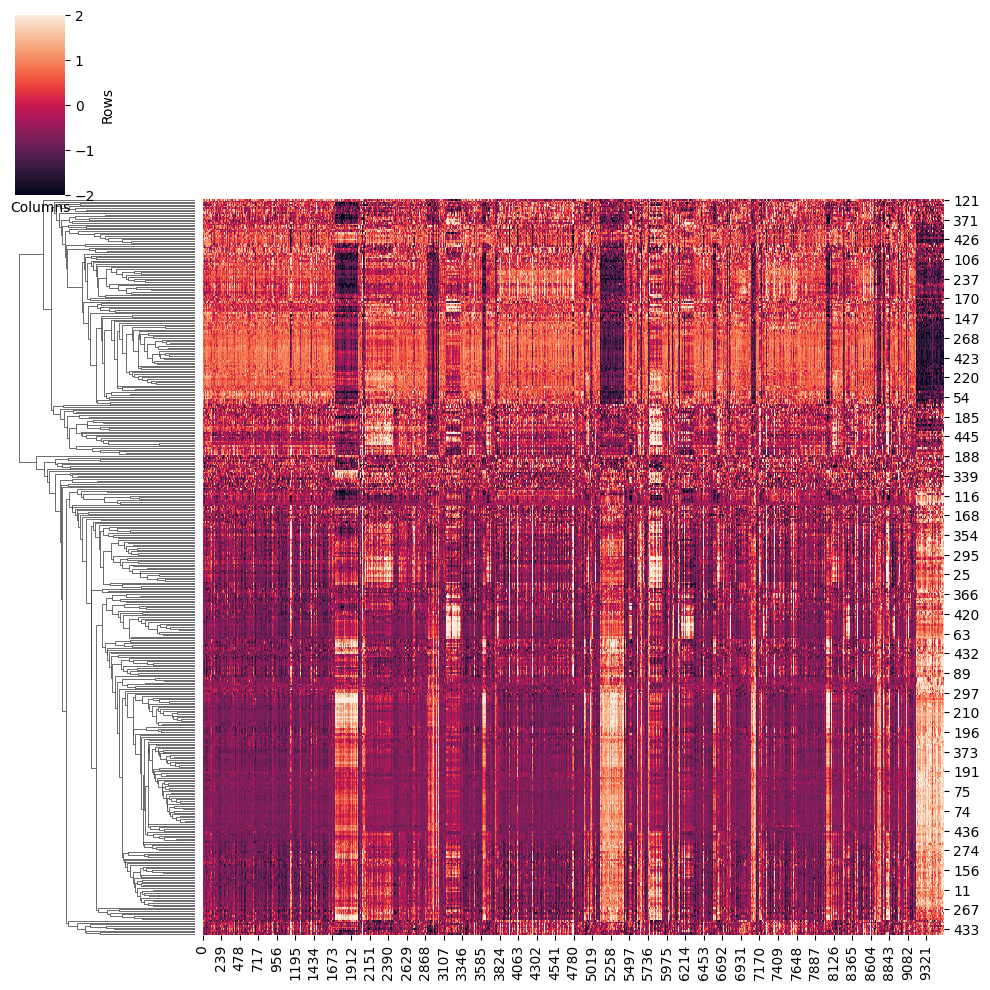

In [22]:
save=True
heatmap_cluster(TF_activity,adata_RNA,save,outdir)

In [25]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# load data
tf_re_binding = pd.read_csv('/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER/output/cell_population_TF_RE_binding.txt', sep='\t')
trans_regulatory = pd.read_csv('/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER/output/cell_population_trans_regulatory.txt', sep='\t')
cis_regulatory = pd.read_csv('/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/LINGER/output/cell_population_cis_regulatory.txt', sep='\t', header=None)
cis_regulatory.columns = ['region', 'target_gene', 'cis_score']

In [26]:
tf_re_binding 

,Unnamed: 0,AIRE,TWIST1,SOX15,FOXD2,NEUROD2,IRF1,PPARG,ALX3,IRF2,...,HSF4,STAT1,TFEC,E2F5,TBX18,HIC1,NFKB2,STAT4,ZFX,HOXC5
0,chr1:100028489-100029404,0.998613,0.997650,0.999054,0.998031,0.998455,0.997799,0.997441,0.999389,0.997256,...,0.997706,0.998713,0.998110,0.993702,0.998144,0.998044,0.998155,0.998792,0.989730,0.998753
1,chr1:100034436-100035279,0.999023,0.998002,0.998643,0.998141,0.999578,0.996796,0.996359,0.999362,0.998140,...,0.997902,0.997829,0.995580,0.994009,0.998090,0.995551,0.997469,0.998009,0.990682,0.998133
2,chr1:100035922-100040109,0.999264,0.998768,0.999666,0.999090,0.999658,0.998487,0.997839,0.999535,0.998599,...,0.998752,0.999162,0.998472,0.996549,0.997166,0.996390,0.998768,0.999215,0.995251,0.998755
3,chr1:100041493-100041927,0.998125,0.997155,0.998155,0.997290,0.998771,0.994115,0.990095,0.998979,0.996483,...,0.998533,0.996771,0.995454,0.995239,0.997627,0.994937,0.997017,0.996994,0.989157,0.997405
4,chr1:100046068-100047735,0.999262,0.998465,0.999636,0.998505,0.999635,0.998818,0.997999,0.999566,0.998665,...,0.999151,0.998888,0.998313,0.996264,0.996902,0.997062,0.998469,0.999374,0.993780,0.998741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96528,chrX:9981210-9982172,0.999312,0.996635,0.997692,0.997746,0.998730,0.997972,0.997777,0.998180,0.999081,...,0.997011,0.998970,0.998869,0.997926,0.997157,0.996724,0.997364,0.998223,0.996561,0.996796
96529,chrX:9983431-9983799,0.999231,0.996035,0.998414,0.997049,0.998743,0.997489,0.998047,0.998163,0.998707,...,0.996207,0.998635,0.999073,0.997770,0.996890,0.996599,0.996227,0.998695,0.995339,0.995633
96530,chrX:9986525-9987246,0.989480,0.987022,0.995243,0.996400,0.995481,0.988732,0.994080,0.994807,0.988133,...,0.986450,0.995012,0.991095,0.987532,0.992563,0.989007,0.986457,0.992448,0.982753,0.993563
96531,chrX:9995697-9996334,0.998921,0.997001,0.996559,0.996852,0.998163,0.997641,0.998063,0.998339,0.998705,...,0.997296,0.998573,0.998664,0.997530,0.996961,0.995779,0.998075,0.998441,0.996739,0.997591


In [27]:
cis_regulatory 

,region,target_gene,cis_score
0,chr1:100028489-100029404,AGL,2.674675e-06
1,chr1:100028489-100029404,CDC14A,6.730014e-04
2,chr1:100028489-100029404,DBT,2.761350e-05
3,chr1:100028489-100029404,DPH5,7.527011e-05
4,chr1:100028489-100029404,EXTL2,9.237049e-07
...,...,...,...
1529208,chrX:9995697-9996334,MID1,7.789500e-06
1529209,chrX:9995697-9996334,SHROOM2,3.395896e-07
1529210,chrX:9995697-9996334,TBL1X,5.199912e-04
1529211,chrX:9995697-9996334,WWC3,5.111039e-04


In [28]:
trans_regulatory 

,Unnamed: 0,AHR,AIRE,ALX3,ALX4,AR,ARID3A,ARID3B,ARID5A,ARID5B,...,ZNF281,ZNF35,ZNF354C,ZNF410,ZNF415,ZNF423,ZNF691,ZNF711,ZNF740,ZSCAN22
0,SAMD11,1.014362e-05,4.111435e-06,1.323462e-06,7.098003e-07,2.889922e-06,3.676984e-06,5.967269e-06,6.451158e-06,7.172906e-06,...,1.593681e-05,7.006318e-06,7.927596e-06,1.343824e-05,4.693987e-06,1.009306e-05,9.190536e-06,1.082537e-05,1.690087e-05,8.002450e-06
1,NOC2L,4.743715e-05,1.959881e-05,5.823930e-06,4.105052e-06,1.326145e-05,2.776053e-05,2.420078e-05,2.885662e-05,1.849447e-05,...,7.402853e-05,5.941787e-05,4.423042e-05,5.517067e-05,2.105669e-05,5.441024e-05,5.226203e-05,4.062732e-05,6.704203e-05,2.207202e-05
2,KLHL17,3.870025e-07,9.228799e-08,5.252404e-08,3.644160e-08,1.055747e-07,2.941460e-07,2.793627e-07,2.040093e-07,2.587101e-07,...,7.265159e-07,3.130661e-07,3.756778e-07,5.168310e-07,1.183490e-07,4.663775e-07,4.560201e-07,5.554432e-07,8.517139e-07,2.432061e-07
3,PLEKHN1,1.931819e-06,1.280671e-06,8.379753e-08,1.140531e-07,3.822183e-07,1.031087e-06,7.697836e-07,7.900440e-07,1.223497e-06,...,2.756770e-06,1.475895e-06,1.758960e-06,2.223245e-06,1.119770e-06,1.202299e-06,7.154996e-07,1.645557e-06,3.228584e-06,1.314484e-06
4,HES4,2.135611e-04,1.673070e-05,1.862289e-05,4.280648e-06,1.389561e-05,4.093905e-04,8.189055e-05,4.603238e-05,2.629091e-04,...,1.602765e-04,1.366655e-04,1.755913e-04,1.053566e-04,3.740208e-05,2.199728e-05,5.650320e-05,1.689643e-04,2.100629e-04,8.353470e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,CLIC2,6.454012e-05,2.513514e-04,7.139188e-06,2.790657e-06,1.030013e-05,3.808250e-05,3.369105e-05,3.884118e-05,5.068645e-05,...,4.909330e-05,7.385969e-05,3.742140e-05,6.217357e-05,2.052006e-05,4.730922e-05,4.863335e-05,3.045747e-05,5.462434e-05,2.696808e-05
14903,TMLHE,6.347577e-04,3.114721e-03,3.642771e-05,5.818823e-06,1.572270e-05,3.056875e-04,1.202710e-04,7.995487e-05,8.987618e-03,...,2.169494e-04,8.603943e-05,1.307692e-04,3.387744e-03,3.472063e-03,8.137047e-03,1.165916e-04,4.109908e-05,7.236768e-03,3.116487e-05
14904,SPRY3,1.263799e-07,1.070696e-06,1.745444e-08,1.496165e-08,2.684053e-08,1.694470e-07,1.111449e-07,1.156051e-07,7.670680e-07,...,3.231399e-07,1.360702e-07,7.009042e-08,1.690272e-07,2.431529e-06,2.966495e-06,2.167907e-07,1.332608e-07,2.236661e-07,1.236514e-05
14905,VAMP7,1.100195e-04,1.315564e-03,1.612928e-05,1.505168e-05,2.202443e-05,1.095485e-04,9.532885e-05,1.016155e-04,4.835270e-04,...,7.275580e-05,1.123442e-04,8.818575e-05,7.450087e-05,1.885435e-05,2.101092e-03,1.225075e-04,1.185016e-04,1.201364e-04,2.522458e-03
